<a href="https://colab.research.google.com/github/bye23mj/suanLee/blob/main/TF_1_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0(TensorFlow)_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로우 (Tensorflow)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" width="300">

- 가장 널리 쓰이는 딥러닝 프레임워크 중 하나

- 구글이 주도적으로 개발하는 플랫폼

- 파이썬, C++ API를 기본적으로 제공하고,  
  자바스크립트(JavaScript), 자바(Java), 고(Go), 스위프트(Swift) 등 다양한 프로그래밍 언어를 지원

- tf.keras를 중심으로 고수준 API 통합 (2.x 버전)

- TPU(Tensor Processing Unit) 지원
  - TPU는 GPU보다 전력을 적게 소모, 경제적
  
  - 일반적으로 32비트(float32)로 수행되는 곱셈 연산을 16비트(float16)로 낮춤

## 텐서플로우 아키텍쳐

<img src="https://developers.google.com/machine-learning/crash-course/images/TFHierarchy.svg">

<sub>출처: https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/toolkit</sub>

## 텐서플로우 시작하기

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
print(tf.__version__)

2.8.2


### 텐서(Tensor)의 객체
- 타입(Type): `string`, `float32`, `float16`, `int32`, `int8` 등

- 형상(Shape): 0, 1, 2차원 등의 데이터 차원 

- 축(Rank): 차원의 개수

### 텐서의 차원과 연산

In [3]:
#tf.rank:차원수
a = tf.constant(2)
print(tf.rank(a))
print(a)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [4]:
b = tf.constant([2,3])
print(tf.rank(b))
print(b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([2 3], shape=(2,), dtype=int32)


In [5]:
c = tf.constant([[2,3],[6,7]])
print(tf.rank(c))
print(c)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[2 3]
 [6 7]], shape=(2, 2), dtype=int32)


In [6]:
d = tf.constant(['Hello'])
print(tf.rank(d))
print(d)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([b'Hello'], shape=(1,), dtype=string)


### 난수 생성

In [7]:
rand = tf.random.uniform([1], 0, 1)
print(rand.shape)
print(rand)

(1,)
tf.Tensor([0.6732396], shape=(1,), dtype=float32)


In [8]:
rand2 = tf.random.normal([1,2], 0, 2)
print(rand2.shape)
print(rand2)

(1, 2)
tf.Tensor([[-0.7033373 -2.572624 ]], shape=(1, 2), dtype=float32)


In [9]:
rand3 = tf.random.normal(shape=(3,2), mean=0, stddev=1)
print(rand3.shape)
print(rand3)

(3, 2)
tf.Tensor(
[[-1.2894223   0.18024123]
 [-0.705952    0.16878687]
 [-0.2719387  -2.3405015 ]], shape=(3, 2), dtype=float32)


### 즉시 실행 모드 (Eager Mode) 지원
- 즉시 실행모드를 통해 텐서플로우를 파이썬처럼 사용할 수 있음

- 1.x 버전에서는 '그래프'를 생성하고, 초기화 한 뒤에 세션을 통해 **값을 흐르게 하는 작업**을 진행해야함


In [10]:
a = tf.constant(3)
b = tf.constant(2)

In [11]:
print(tf.add(a,b))
print(a + b)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [12]:
print(tf.subtract(a, b))
print(a-b)

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [13]:
print(tf.multiply(a,b))
print(a * b)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


### 텐서 플로우 ↔ 넘파이
- `numpy()`
- `tf.convet_to_tensor()`

In [14]:
c = tf.add(a,b).numpy()
print(type(c))

<class 'numpy.int32'>


In [15]:
c_squer = np.square(c, dtype=np.float32)
c_tensor = tf.convert_to_tensor(c_squer)

print(c_squer)
print(c_tensor)
print(type(c_tensor))

25.0
tf.Tensor(25.0, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### 넘파이처럼 사용하기


In [16]:
t = tf.constant([[1.,2.,3.], [4., 5., 6.]])

print(t.shape)
print(t.dtype)

(2, 3)
<dtype: 'float32'>


In [17]:
print(t[:, 1:])

tf.Tensor(
[[2. 3.]
 [5. 6.]], shape=(2, 2), dtype=float32)


In [18]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [19]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [20]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [21]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

### 타입 변환
- 텐서의 기본 dtype
  - float형 텐서: `float32`
  - int형 텐서: `int32`

- 연산시 텐서의 타입을 맞춰줘야 함
  - `float32` ~ `float32`
  - `int32` ~ `int32`
  - `flot32` ~ `int32` (x)

- 타입변환에는 `tf.cast()` 사용

In [22]:
a = tf.constant(2)
print(a)

b = tf.constant(2.)
print(b)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [23]:
#tf.constant(2.) + tf.constanst(40)
#error

In [24]:
#tf.constant(2.) + tf.constant(30., dtype=tf.floadt64)
#error

In [25]:
t = tf.constant(30., dtype=tf.float64)
t2 = tf.constant(4.)
print(t2 + tf.cast(t, tf.float32))

tf.Tensor(34.0, shape=(), dtype=float32)


### AutoGraph (오토그래프)

- Tensorflow가 작업을 좀 더 빠르게 동작하게 하기 위한 방법으로 Graph로 만들어 연산을 진행

- `tf.Graph`

- 유연성이 있음

  - 모바일 애플리케이션, 임베디드 기기, 백엔드 서버와 같이 Python 인터프리터가 없는 환경에서 Tensorflow 사용 가능 

In [26]:
import timeit

### @tf.function
- 자동으로 그래프를 생성(Auto Graph)

- 그래프로 변환하여 사용 -> GPU 연산 가능

- 파이썬으로 구성된 함수를 텐서플로우의 그래프 형태로 다루고 싶을 때 사용가능


- 원본 함수가 필요하다면 `(tf.function).python_function()`

In [27]:
@tf.function
def my_function(x):
  return x**2 - 10*x + 3

print(my_function(2))
print(my_function(tf.constant(2)))

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)


In [28]:
def my_function_(x):
  return x**2 - 10*x + 3

print(my_function(2))
print(my_function(tf.constant(2)))

tf.Tensor(-13, shape=(), dtype=int32)
tf.Tensor(-13, shape=(), dtype=int32)


In [29]:
tf_my_func = tf.function(my_function_)

print(tf_my_func)
print(tf_my_func(2))

tf.Tensor(-13, shape=(), dtype=int32)


In [30]:
tf_my_func.python_function(2)

-13

In [31]:
def function_to_get_faster(x,y,b):
  x = tf.matmul(x, y)
  x = x + b 
  return x

a_function_that_uses_a_graph = tf.function(function_to_get_faster)

x1 = tf.constant([[1.0, 2.0]])
y1 = tf.constant([[2.0], [3.0]])
b1 = tf.constant(4.0)

print(function_to_get_faster(x1, y1, b1))
print(a_function_that_uses_a_graph(x1, y1, b1).numpy())

tf.Tensor([[12.]], shape=(1, 1), dtype=float32)
[[12.]]


In [32]:
def inner_function(x,y,b):
  x = tf.matmul(x, y)
  x = x + b 
  return x

@tf.function
def outer_function(x):
  y = tf.constant([[2.0],[3.0]])
  b = tf.constant(4.0)
  return inner_function(x, y, b)

outer_function(tf.constant([[1.0,2.0]])).numpy()


array([[12.]], dtype=float32)

텐서플로우가 `tf.function`으로 변환한 코드

In [33]:
print(tf.autograph.to_code(my_function.python_function))
print(tf.autograph.to_code(tf_my_func.python_function))
print(tf.autograph.to_code(outer_function.python_function))

def tf__my_function(x):
    with ag__.FunctionScope('my_function', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def tf__my_function_(x):
    with ag__.FunctionScope('my_function_', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        try:
            do_return = True
            retval_ = (((ag__.ld(x) ** 2) - (10 * ag__.ld(x))) + 3)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)

def 


 속도 향상


In [34]:
class SequentialModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super(SequentialModel, self).__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten(input_shape=(28,28))
        self.dense_1 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.dense_2 = tf.keras.layers.Dense(10)

    def call(self, x):
        x = self.flatten(x)
        x = self.dense_1(x)
        x = self.dropout(x)
        x = self.dense_2(x)
        return x

input_data = tf.random.uniform([60, 28, 28])

eager_model = SequentialModel()
graph_model = tf.function(eager_model)

print("Eager time:", timeit.timeit(lambda: eager_model(input_data), number=10000))
print("Graph time:", timeit.timeit(lambda: graph_model(input_data), number=10000))

Eager time: 11.916610114999997
Graph time: 5.648874956


### 변수 생성

- `tf.Variable`
- 딥러닝 모델 학습 시, 그래프 연산이 필요할 때 사용

In [35]:
X = tf.Variable(20.0).numpy()
print(X)

20.0


### Autograd (자동 미분)

- `tf.GradientTape` API를 사용
- `tf.Variable` 같은 일부 입력에 대한 기울기 계산
  - 기본적으로 한번만 사용됨
- 변수가 포함된 연산만 기록

In [36]:
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x**2

In [37]:
dy_dx = tape.gradient(y, x)
dy_dx.numpy()

6.0

In [38]:
#x2 = tf.Variable(4.0)
#dy_dx = tape.gradient(y, x2)
#dy_dx.numpy()

In [39]:
x = tf.Variable(2.0)
x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y_sq = y**2
  z = x**2 + tf.stop_gradient(y_sq)

grad = tape.gradient(z, {'x':x, 'y':y})

print('dz/dx', grad['x'])
print('dz/dy', grad['y'])

dz/dx tf.Tensor(6.0, shape=(), dtype=float32)
dz/dy None


In [40]:
weights = tf.Variable(tf.random.normal((3,2)), name='weights')
biases = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ weights + biases
  loss = tf.reduce_mean(y**2)  

In [41]:
[dl_dw, dl_db] = tape.gradient(loss, [weights, biases])

In [42]:
print(weights.shape)
print(loss)
print(dl_dw.shape)

(3, 2)
tf.Tensor(22.759209, shape=(), dtype=float32)
(3, 2)


In [43]:
weights2 = tf.Variable(tf.random.normal((3,2)), name = 'weights')
biases2 = tf.Variable(tf.zeros(2, dtype=tf.float32), name='biases')
x2 = [[4., 5., 6.]]

with tf.GradientTape(persistent=True) as tape:
  y = x2 @ weights2 + biases2
  loss = tf.reduce_mean(y**2)  

[dl_dw2, dl_db2] = tape.gradient(loss, [weights2, biases2])

print(weights2.shape)
print(dl_dw2.shape)

(3, 2)
(3, 2)


In [44]:
del tape

## 간단한 신경망 구조 

### 뉴런
- 입력 → 연산 → 활성화함수 → 출력

In [45]:
def sigmoid(x):
  return(1 / (1 + np.exp(-x)))

def Neuron(x, W, bias=0):
  z = x * W + bias
  return sigmoid(z)

In [46]:
x = tf.random.normal((1,2), 0, 1)
W = tf.random.normal((1,2), 0, 1)

print('x.shape', x.shape)
print('W.shape', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape (1, 2)
W.shape (1, 2)
tf.Tensor([[-1.5940467  -0.28680915]], shape=(1, 2), dtype=float32)
tf.Tensor([[ 0.31750134 -0.85908735]], shape=(1, 2), dtype=float32)
[[0.37610543 0.5612888 ]]


In [47]:
x = tf.random.normal((2,1), 0, 1)
W = tf.random.normal((2,1), 0, 1)

print('x.shape', x.shape)
print('W.shape', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape (2, 1)
W.shape (2, 1)
tf.Tensor(
[[1.852723  ]
 [0.32481694]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[-0.5776644 ]
 [ 0.48517564]], shape=(2, 1), dtype=float32)
[[0.25535515]
 [0.539317  ]]


In [48]:
x = tf.random.normal((1,), 0, 1)
W = tf.random.normal((2,1), 0, 1)

print('x.shape', x.shape)
print('W.shape', W.shape)

print(x)
print(W)

print(Neuron(x, W))

x.shape (1,)
W.shape (2, 1)
tf.Tensor([0.35211366], shape=(1,), dtype=float32)
tf.Tensor(
[[-0.4597306]
 [-1.4830847]], shape=(2, 1), dtype=float32)
[[0.45961878]
 [0.3723346 ]]


### 퍼셉트론 학습 알고리즘 (가중치 업데이트)

## $\qquad w^{(next step)} = w + \eta \ (y - \tilde{y}) \ x$

- $w \ $: 가중치

- $\eta \ $ : 학습률

- $y \ $ : 정답 레이블

- $\tilde{y} \ $: 예측 레이블


In [49]:
x = 1
y = 0
W = tf.random.normal([1], 0, 1)
print(Neuron(x,W))
print('y:', y)

[0.3403672]
y: 0


In [51]:
for i in range(1000):
  output = Neuron(x,W)
  error = y - output
  W = W + x * 0.1 * error

  if i %100 == 99:
    print("{}\t{}\t{}".format(i+1, error, output))


100	[-0.04849459]	[0.04849459]
200	[-0.03306765]	[0.03306765]
300	[-0.02502013]	[0.02502013]
400	[-0.02009858]	[0.02009858]
500	[-0.01678411]	[0.01678411]
600	[-0.01440252]	[0.01440252]
700	[-0.01260968]	[0.01260968]
800	[-0.01121189]	[0.01121189]
900	[-0.01009185]	[0.01009185]
1000	[-0.00917444]	[0.00917444]


In [76]:
def Neuron2(x, W, bias=0):
  z = tf.matmul(x, W, transpose_b=True) + bias
  return sigmoid(z)

In [77]:
x = tf.random.normal((1,3), 0, 1)
y = tf.ones(1)
W = tf.random.normal((1,3), 0, 1)

print(Neuron2(x, W))
print("y:", y.numpy())

[[0.9161826]]
y: [1.]


In [78]:
for i in range(1000):
  output = Neuron2(x,W)
  error = y - output
  W = W + x * 0.1 * error

  if i %100 == 99:
    print("{}\t{}\t{}".format(i+1, error, output))


100	[[0.02377361]]	[[0.9762264]]
200	[[0.01366878]]	[[0.9863312]]
300	[[0.00957602]]	[[0.990424]]
400	[[0.00736505]]	[[0.99263495]]
500	[[0.0059818]]	[[0.9940182]]
600	[[0.00503528]]	[[0.9949647]]
700	[[0.00434697]]	[[0.99565303]]
800	[[0.003824]]	[[0.996176]]
900	[[0.0034132]]	[[0.9965868]]
1000	[[0.00308192]]	[[0.9969181]]


In [79]:
x = tf.random.normal((1,3), 0, 1)
weights = tf.random.normal((1,3), 0, 1)
bias = tf.zeros((1, 1))

y = tf.ones((1,))

print("x\t: {}\nweights\t: {}\nbias\t: {}".format(x, weights, bias))


x	: [[ 1.0015544  -1.3486041  -0.36354247]]
weights	: [[1.4694885 1.008043  0.6048172]]
bias	: [[0.]]


In [80]:
for i in range(1000):
  output = Neuron2(x, weights, bias=bias)
  error = y - output
  weights = weights + x * 0.1 * error
  bias = bias + 1 * 0.1 * error

  if i %100 == 99:
    print("{}\t{}\t{}".format(i+1, error, output))

100	[[0.02636695]]	[[0.97363305]]
200	[[0.01300627]]	[[0.98699373]]
300	[[0.00861394]]	[[0.99138606]]
400	[[0.00643522]]	[[0.9935648]]
500	[[0.00513464]]	[[0.99486536]]
600	[[0.00427085]]	[[0.99572915]]
700	[[0.00365549]]	[[0.9963445]]
800	[[0.00319493]]	[[0.9968051]]
900	[[0.00283748]]	[[0.9971625]]
1000	[[0.00255167]]	[[0.9974483]]


### AND Gate

In [82]:
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[1], [0], [0], [0]])

W = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(X[j] * W) + b_x + b)
    error = Y[j][0] - output
    W = W + X[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 0:
    print("epoch {:4d}\tError Sum {}".format(i, error_sum))

print("\n가중치\t: {}".format(W))
print("편향\t: {}".format(b))

epoch    0	Error Sum [-2.0269105]
epoch  200	Error Sum [-0.11481139]
epoch  400	Error Sum [-0.06726152]
epoch  600	Error Sum [-0.04746673]
epoch  800	Error Sum [-0.03656593]
epoch 1000	Error Sum [-0.02968044]
epoch 1200	Error Sum [-0.02494802]
epoch 1400	Error Sum [-0.02149949]
epoch 1600	Error Sum [-0.01887984]
epoch 1800	Error Sum [-0.01682112]

가중치	: [6.960852  6.9640107]
편향	: [-11.6204195]


In [83]:
for i in range(4):
  print("X :{} Y:{} output:{}".format(X[i], Y[i], sigmoid(np.sum(X[i] * W) + b)))

X :[1 1] Y:[1] output:[0.9092444]
X :[1 0] Y:[0] output:[0.00938171]
X :[0 1] Y:[0] output:[0.00941111]
X :[0 0] Y:[0] output:[8.980737e-06]


### OR Gate

In [84]:
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[1], [1], [1], [0]])

W = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(X[j] * W) + b_x + b)
    error = Y[j][0] - output
    W = W + X[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 0:
    print("epoch {:4d}\tError Sum {}".format(i, error_sum))

print("\n가중치\t: {}".format(W))
print("편향\t: {}".format(b))

epoch    0	Error Sum [-0.05903059]
epoch  200	Error Sum [-0.05564803]
epoch  400	Error Sum [-0.0275078]
epoch  600	Error Sum [-0.0181364]
epoch  800	Error Sum [-0.0134751]
epoch 1000	Error Sum [-0.01069846]
epoch 1200	Error Sum [-0.00886074]
epoch 1400	Error Sum [-0.0075566]
epoch 1600	Error Sum [-0.0065839]
epoch 1800	Error Sum [-0.00583202]

가중치	: [8.182695 8.181134]
편향	: [-4.6253033]


In [85]:
for i in range(4):
  print("X :{} Y:{} output:{}".format(X[i], Y[i], sigmoid(np.sum(X[i] * W) + b)))

X :[1 1] Y:[1] output:[0.999992]
X :[1 0] Y:[1] output:[0.9722774]
X :[0 1] Y:[1] output:[0.97223526]
X :[0 0] Y:[0] output:[0.00970556]


### XOR Gate

In [86]:
X = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y = np.array([[0], [1], [1], [0]])

W = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
  error_sum = 0

  for j in range(4):
    output = sigmoid(np.sum(X[j] * W) + b_x + b)
    error = Y[j][0] - output
    W = W + X[j] * 0.1 * error
    b = b + b_x * 0.1 * error
    error_sum += error

  if i % 200 == 0:
    print("epoch {:4d}\tError Sum {}".format(i, error_sum))

print("\n가중치\t: {}".format(W))
print("편향\t: {}".format(b))

epoch    0	Error Sum [0.34576565]
epoch  200	Error Sum [-0.00530791]
epoch  400	Error Sum [-0.00021595]
epoch  600	Error Sum [-8.940697e-06]
epoch  800	Error Sum [-8.940697e-07]
epoch 1000	Error Sum [-1.013279e-06]
epoch 1200	Error Sum [-1.013279e-06]
epoch 1400	Error Sum [-1.013279e-06]
epoch 1600	Error Sum [-1.013279e-06]
epoch 1800	Error Sum [-1.013279e-06]

가중치	: [ 5.1279660e-02 -2.0749867e-06]
편향	: [-0.9999969]


In [87]:
for i in range(4):
  print("X :{} Y:{} output:{}".format(X[i], Y[i], sigmoid(np.sum(X[i] * W) + b)))

X :[1 1] Y:[0] output:[0.27914244]
X :[1 0] Y:[1] output:[0.2791429]
X :[0 1] Y:[1] output:[0.2689416]
X :[0 0] Y:[0] output:[0.26894203]


In [93]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(111)

X4 = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
Y4 = np.array([[0], [1], [1], [0]])

model = Sequential([Dense(units=2, activation='sigmoid', input_shape=(2, )),
                    Dense(units=1, activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(X4, Y4, epochs=2000, batch_size=1, verbose=1)

In [92]:
model.predict(X4)

array([[0.23792972],
       [0.8103445 ],
       [0.6194027 ],
       [0.28790998]], dtype=float32)

## 시각화 사용

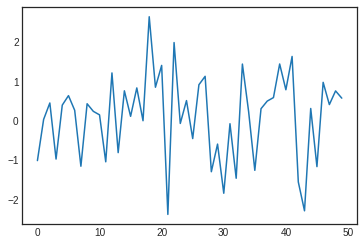

In [95]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x= range(50)
y = tf.random.normal([50], 0, 1)
plt.plot(x,y)
plt.show()

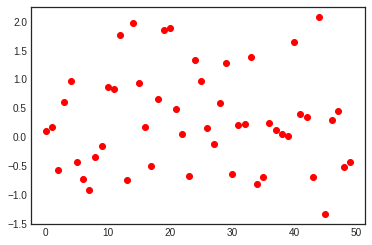

In [97]:
x = range(50)
y = tf.random.normal([50], 0, 1)
plt.plot(x,y, 'ro')
plt.show()

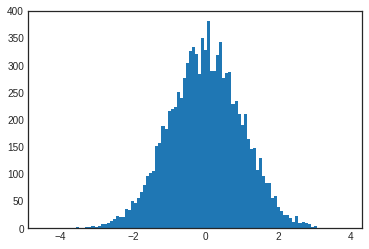

In [98]:
random_normal = tf.random.normal([10000], 0, 1)
plt.hist(random_normal, bins=100)
plt.show()

### XOR Gate의 'LOSS' 시각화


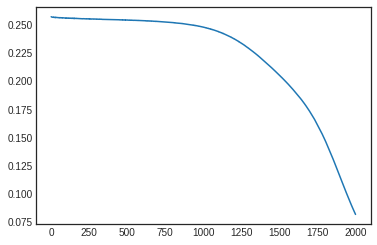

In [99]:
plt.plot(history.history['loss'])